#### Campaign for selling personal loans.

#### This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

#### The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### 1. Read the column description and ensure you understand each attribute well

In [5]:
import pandas as pd
import numpy       as np
import scipy.stats as stats
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
from sklearn.linear_model import LogisticRegression
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
import seaborn as sns
import os

df = pd.read_csv(os.getcwd() + '/Bank_Personal_Loan_Modelling-1.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

#### 2. Study the data distribution in each attribute, share your findings. (5 points)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


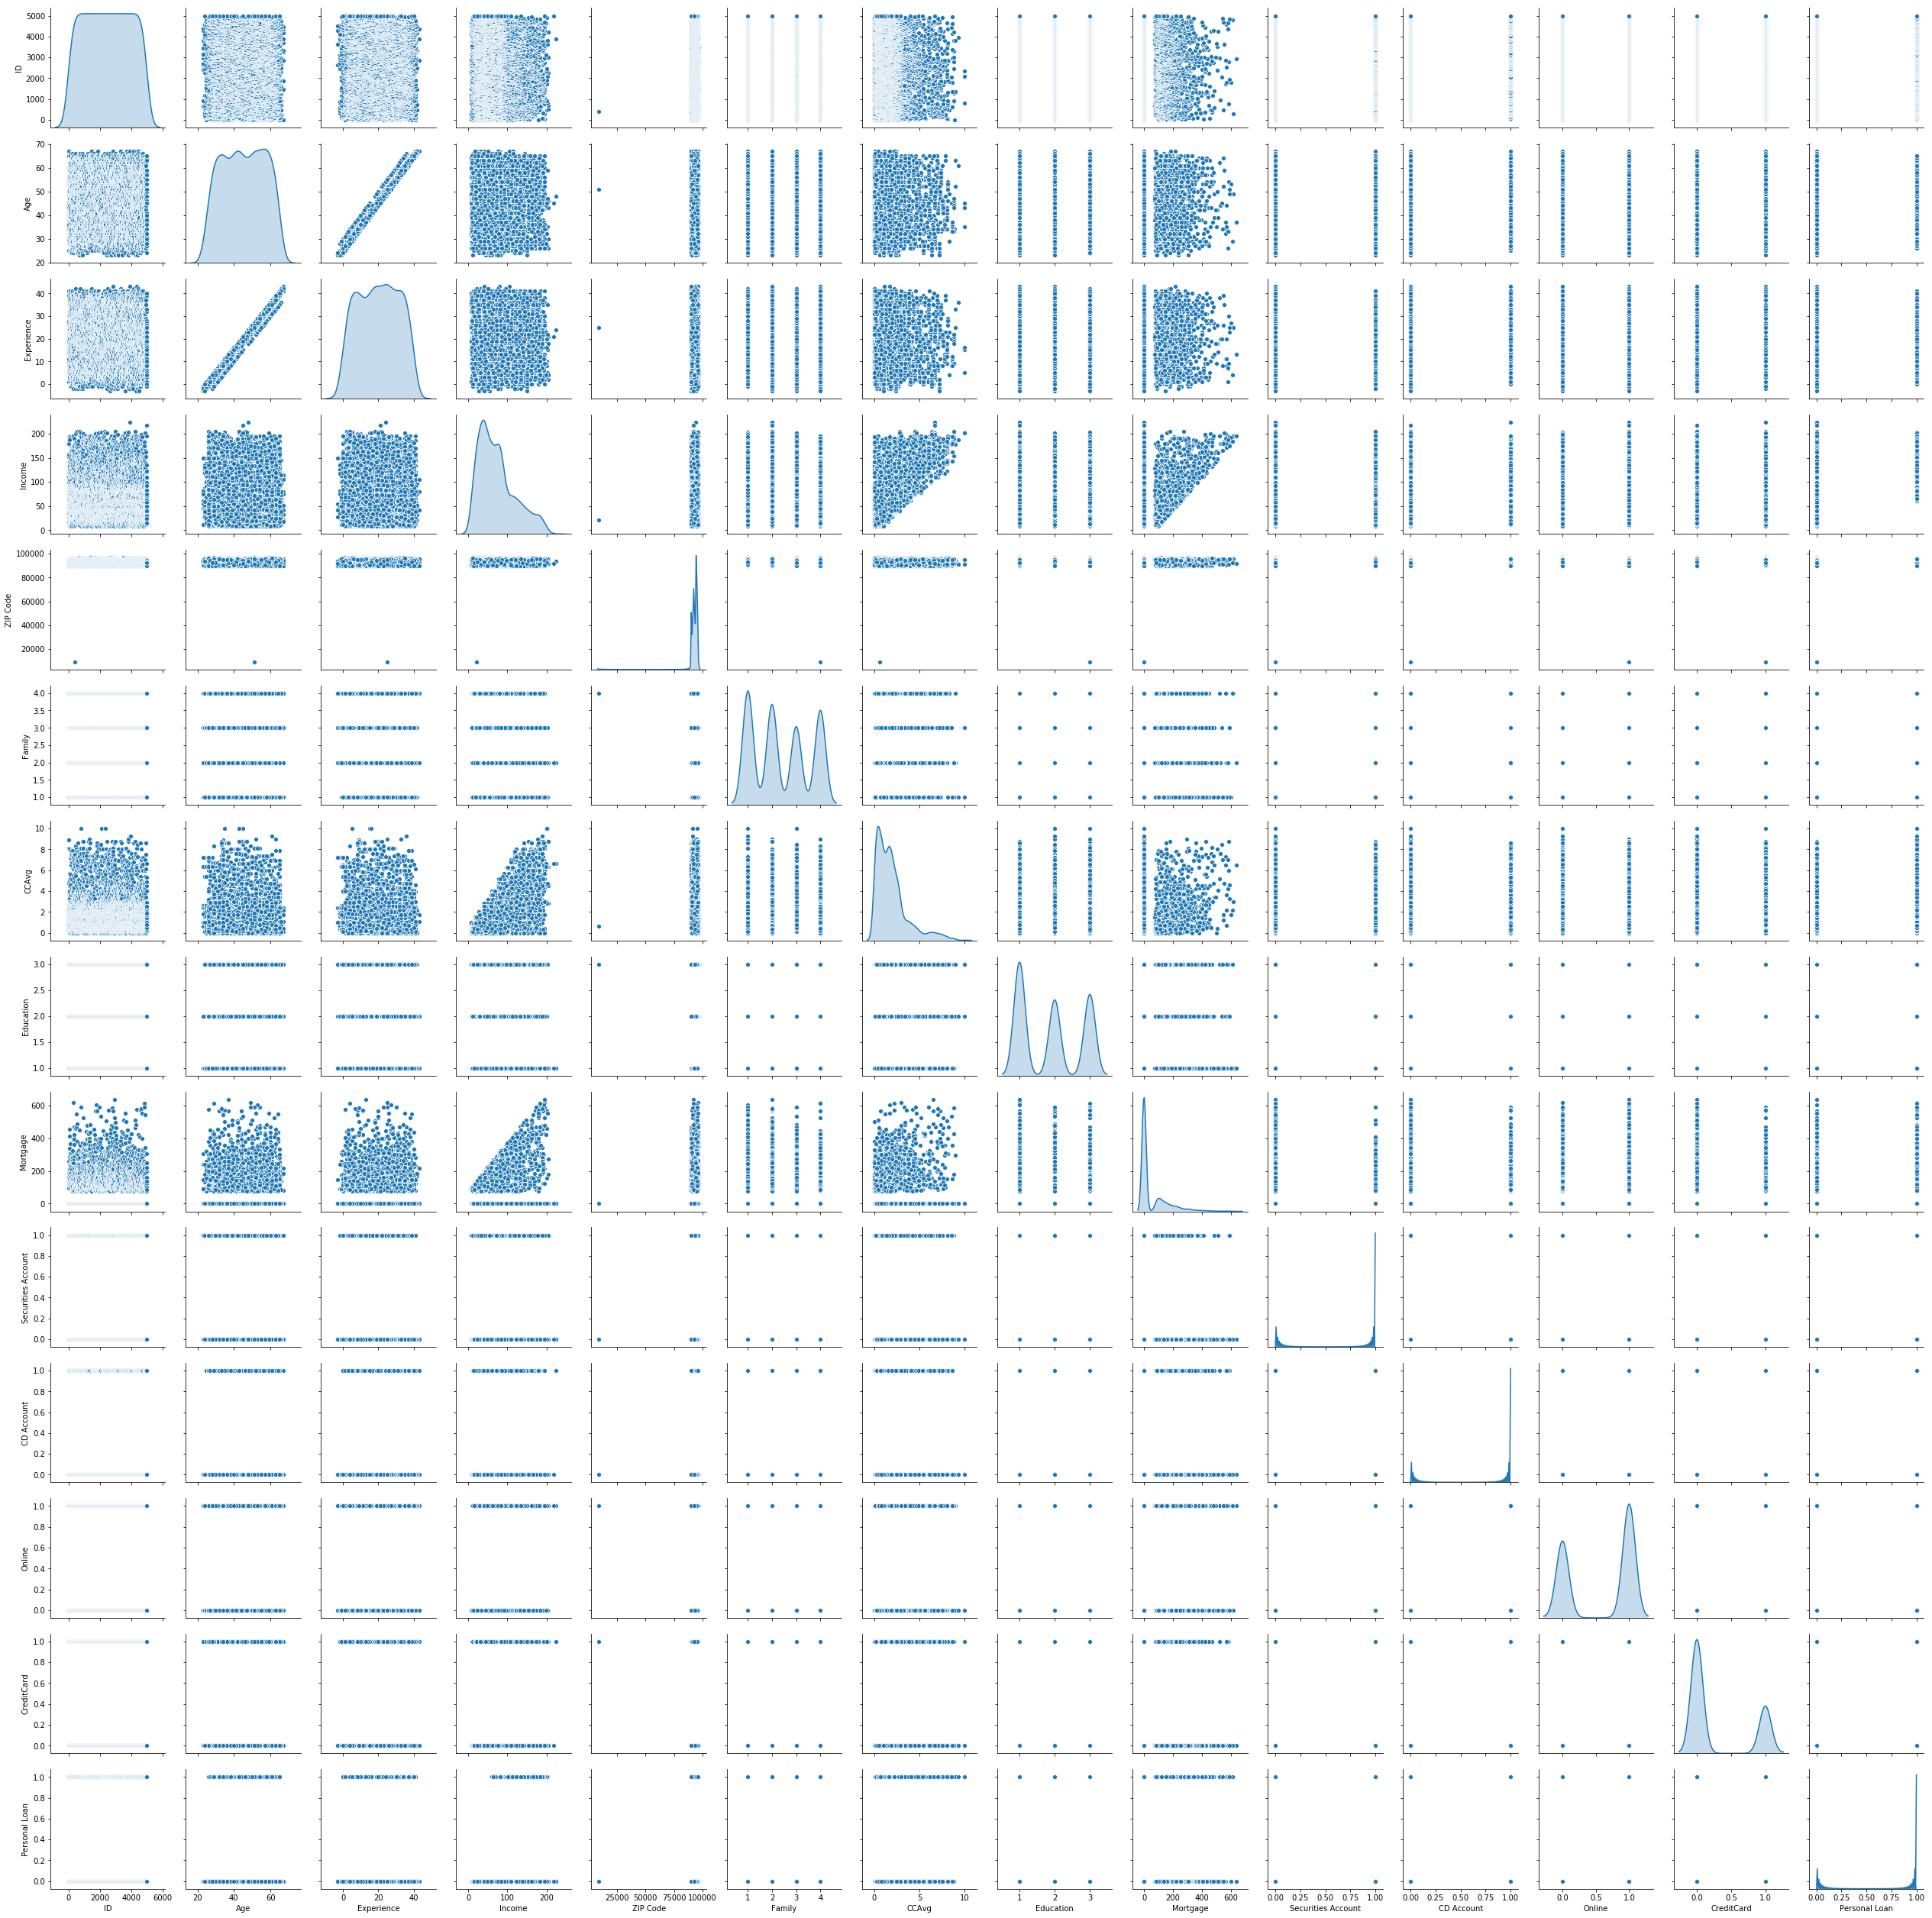

In [8]:
sns.pairplot(df, diag_kind='kde')

looking at the pair plot it shows column 'Age', 'Experience', 'Income' contributes majorly in finding whether a persona will take loan or not

#### 3. Get the target column distribution. Your comments

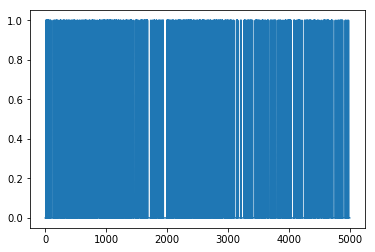

In [9]:
plt.plot(df["Personal Loan"])

this shows target column 'Personal loan' has value 0 & 1

#### 4. Split the data into training and test set in the ratio of 70:30 respectively

In [10]:
from sklearn.model_selection import train_test_split
array = df.values
X = array[:,:-1] #select independent variables only
y = array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.fit(X_train, y_train))
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print ("The accuracy of Logistic Regression model is : %f" % model_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
The accuracy of Logistic Regression model is : 0.908000


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  raise ValueError("multi_class should be either multinomial or "
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  raise ValueError("multi_class should be either multinomial or "


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

myList = list(range(1,20))

cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

NNH = KNeighborsClassifier(best_k)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
knn_score = NNH.score(X_test, y_test)
print ("The accuracy of KNN model is : %f" % knn_score)

The optimal number of neighbors is 12
The accuracy of KNN model is : 0.900667


Naïve Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
gaus_score = model.score(X_test, y_test)
print ("The accuracy of Naïve Bayes model is : %f" % gaus_score)

The accuracy of Naïve Bayes model is : 0.882667


#### 6.Print the confusion matrix for all the above models (5 points)

In [15]:
from sklearn import metrics
from sklearn.metrics import recall_score

print("confusion matrix for Logistic model")
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

confusion matrix for Logistic model
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1351
         1.0       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500

[[1319   32]
 [ 106   43]]


In [16]:
print("confusion matrix for KNN model")
print(metrics.classification_report(y_test, predicted_labels))
print(metrics.confusion_matrix(y_test, predicted_labels))

confusion matrix for KNN model
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1351
         1.0       0.00      0.00      0.00       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

[[1351    0]
 [ 149    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  


In [17]:
print("confusion matrix for Naïve Bayes model")
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

confusion matrix for Naïve Bayes model
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1351
         1.0       0.43      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1239  112]
 [  64   85]]


#### 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized.
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

confusion matrix for Logistic model shows that recal value is greater than precision value which mean the most of the samples are correctly identified .i.e out of 1319 people who didnot accept personal loan 43 were wrongly classified and out of 106 members who accepted personal loan 32 were wrongly classified. 

confusion matrix for KNN model shows that recal value is equal to 1 that is not error has occured in this model in predicting target  .i.e out of 1351 people who didnot accept personal loan 0 were wrongly classified and out of 149 members who accepted personal loan 0 were wrongly classified. 

confusion matrix for Naïve Bayes model show that shows that recal value less than precision value which means many data are wrongly predicted and the model not giving the correct result  .i.e 1239 people only were found not taking personal loan and 64 people were found taking personal loan 
